In [0]:
!git clone https://github.com/shamaunalam/Face_II.git

Cloning into 'Face_II'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 92 (delta 6), reused 16 (delta 5), pack-reused 69
Unpacking objects: 100% (92/92), done.


In [0]:
!ls Face_II

abhijeet_mukhrjee.p		     prateek.p
aldrin.p			     priyesh.p
asutosh.p			     __pycache__
collect_data.py			     README.md
consolidated			     recognize.py
create_consolidated.py		     shamaun.p
face_model_0999.h5		     sripad.p
face_model_multi.h5		     sushree.p
facerecog_nural_net.ipynb	     taras.p
haarcascade_frontalface_default.xml  uma.p
haarcascade_profileface.xml	     vaishnav.p
Label_mapping.txt		     view_extracted_features.py
piyush.p			     visualize.py


In [0]:
!pwd

/content


In [0]:
!ls Face_II/consolidated/

images.p  labels.p


In [0]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import random

In [0]:
with open('Face_II/consolidated/images.p','rb') as f:
  x_train=pickle.load(f)
with open('Face_II/consolidated/labels.p','rb') as f:
  y_train=pickle.load(f)

In [0]:
print(x_train.shape)
print(y_train.shape)

(1200, 200, 200)
(1200,)


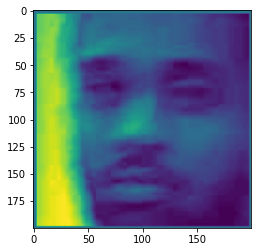

In [0]:
plt.imshow(x_train[0])
plt.show()

In [0]:
y_train

array(['abhijeet_mukhrjee', 'abhijeet_mukhrjee', 'abhijeet_mukhrjee', ...,
       'vaishnav', 'vaishnav', 'vaishnav'], dtype='<U17')

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)

In [0]:
y_train

array([ 0,  0,  0, ..., 11, 11, 11])

In [0]:
labels=np.array(list(set(y_train)))
labels=le.inverse_transform(labels)
print(labels)

['abhijeet_mukhrjee' 'aldrin' 'asutosh' 'piyush' 'prateek' 'priyesh'
 'shamaun' 'sripad' 'sushree' 'taras' 'uma' 'vaishnav']


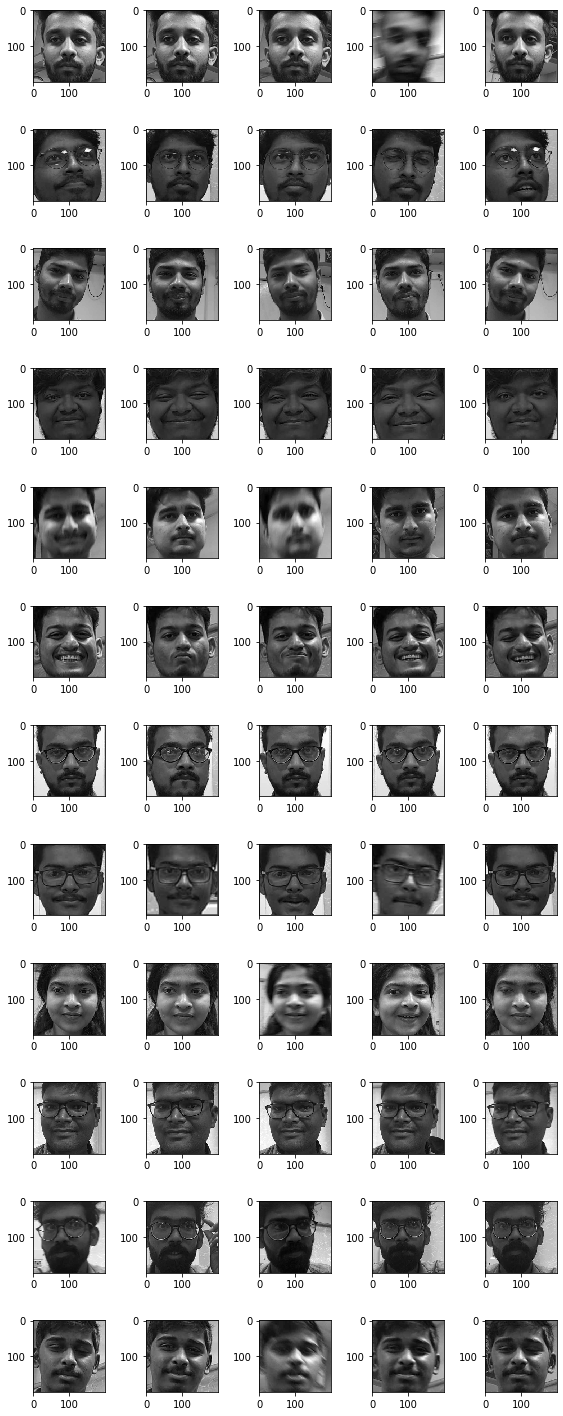

In [0]:
n_classes=12
n_cols=5
fig,axes=plt.subplots(nrows=n_classes,ncols=n_cols,figsize=(8,20))
fig.tight_layout()

for i in range(n_cols):
  for j in range(n_classes):
      selected_images=x_train[y_train==j]
      img=selected_images[random.randint(0,len(selected_images)-1),:,:]
      axes[j][i].imshow(img,cmap='gray')

In [0]:
x_train=x_train.reshape(x_train.shape[0],200,200,1)
x_train=x_train/255

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.optimizers import Adam,RMSprop
from keras.utils.np_utils import to_categorical 
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
y_train=to_categorical(y_train,12)

In [0]:
datagen=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,rotation_range=10,brightness_range=(-0.5,0.5))

In [0]:
model=Sequential()
model.add(Conv2D(16,(3,3),input_shape=(200,200,1),activation='relu'))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(12,activation='softmax'))
model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
h=model.fit_generator(datagen.flow(x_train,y_train,batch_size=128,shuffle=True),steps_per_epoch=2000,epochs=10,verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





 806/2000 [===========>..................] - ETA: 8:48 - loss: 1.6492 - acc: 0.4213

KeyboardInterrupt: ignored

In [0]:
from keras.models import load_model,Model

In [0]:
mdl=load_model('Face_II/face_model_multi.h5')
print(mdl.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 16)        416       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 16)        6416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 19, 19, 32)        12832     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)         

In [0]:
layer_1=Model(mdl.layers[0].input,mdl.layers[0].output)
layer_2=Model(mdl.layers[0].input,mdl.layers[4].output)

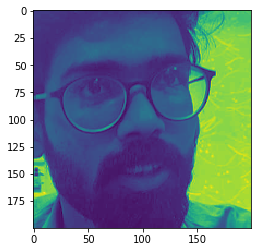

In [0]:
img=x_train[1051]
plt.imshow(img.reshape(200,200))
plt.show()

In [0]:
features_1=layer_1.predict(img.reshape(1,200,200,1))
features_2=layer_2.predict(img.reshape(1,200,200,1))

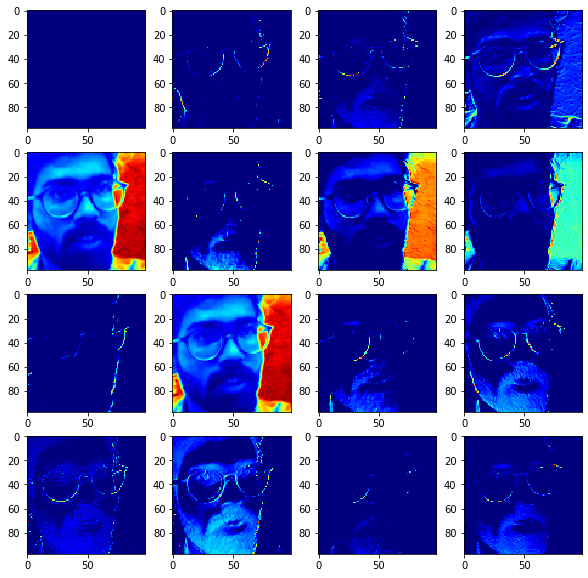

In [0]:
plt.figure(figsize=(10,10))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(features_1[0,:,:,i],cmap='jet')
plt.show()

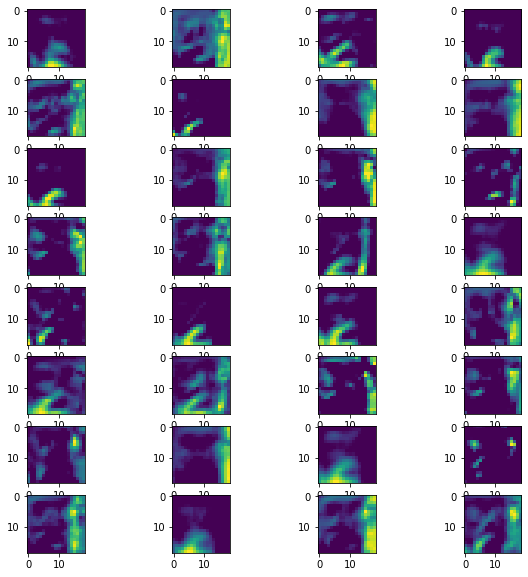

In [0]:
plt.figure(figsize=(10,10))
for i in range(32):
  plt.subplot(8,4,i+1)
  plt.imshow(features_2[0,:,:,i])
plt.show()

In [0]:
features_1.shape

(1, 98, 98, 16)